# Importing 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns 

## Selecting Url to work with 
url="https://raw.githubusercontent.com/JuanBecerra07/bootCAMP-DS_JUAN-BECERRA-/main/Actividad%201/healthcare_dataset.csv"
df=pd.read_csv(url,sep=',',encoding='utf-8')
df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,James Hood,83,Male,A+,Obesity,2022-07-29,Samuel Moody,"Wood, Martin and Simmons",UnitedHealthcare,39606.840083,110,Elective,2022-08-02,Ibuprofen,Abnormal
9996,Stephanie Evans,47,Female,AB+,Arthritis,2022-01-06,Christopher Yates,Nash-Krueger,Blue Cross,5995.717488,244,Emergency,2022-01-29,Ibuprofen,Normal
9997,Christopher Martinez,54,Male,B-,Arthritis,2022-07-01,Robert Nicholson,Larson and Sons,Blue Cross,49559.202905,312,Elective,2022-07-15,Ibuprofen,Normal
9998,Amanda Duke,84,Male,A+,Arthritis,2020-02-06,Jamie Lewis,Wilson-Lyons,UnitedHealthcare,25236.344761,420,Urgent,2020-02-26,Penicillin,Normal


# =Columns to work with

In [2]:
df.columns


Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

# Checking for nulls ans check the shape of the df 


In [3]:
df.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [4]:
Bt=df['Blood Type']
Bt.value_counts()

Blood Type
AB-    1275
AB+    1258
B-     1252
O+     1248
O-     1244
B+     1244
A+     1241
A-     1238
Name: count, dtype: int64

# Playing with the values 

In [5]:
Bt=df['Blood Type']
Bt.value_counts()
age =df['Age']
age.value_counts()
##sns.displot(age)


Age
59    175
78    174
31    172
20    169
35    169
     ... 
34    125
47    125
85    123
22    123
45    120
Name: count, Length: 68, dtype: int64

# AB- Most affected bllod type 

<Axes: xlabel='Blood Type'>

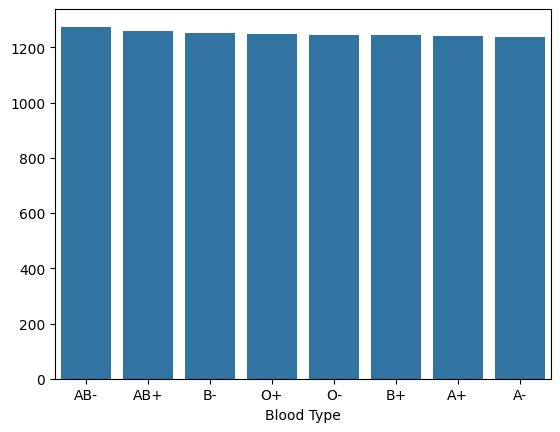

In [6]:
blood = df['Blood Type'].value_counts()
sns.barplot(x=blood.index , y= blood.values)


# Mayor Gender affected in total is female

<Axes: xlabel='Gender', ylabel='count'>

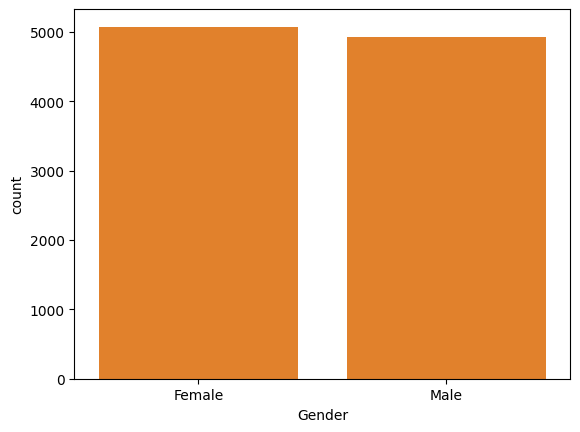

In [7]:
Gender =df['Gender'].value_counts()
sns.barplot(Gender)
sns.barplot(x=Gender.index , y = Gender.values)

Since Asthma is the most likely condition lets separate sex and age to find a relation 

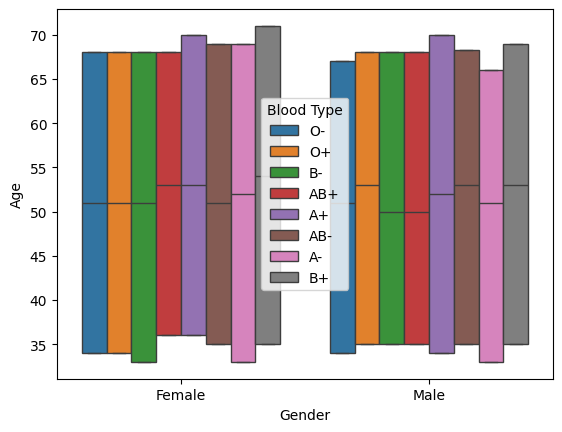

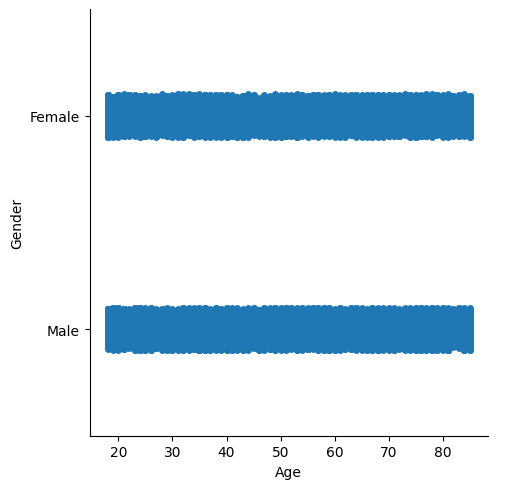

In [18]:
ill_asma = df[df['Medical Condition']== 'Asthma']
##ill_asma = df['Age']
##ill_asma.value_counts()
ill_asma
ill_asma =df[['Blood Type','Gender','Age']]
sns.boxplot(data = ill_asma ,x= 'Gender',y= 'Age', hue = 'Blood Type', showfliers = False, whis = False )
sns.catplot(data=ill_asma, x="Age", y="Gender")
##sns.violinplot(data = ill_asma , x= 'Gender', y= 'Age', hue = 'Blood Type')





# Billing amount relation
 For the moment we need to normalize the values inside the colunm billing amount, to findout in which health provider we have the most billing amount.
 With the grafics we can notice that in females the BLUE CROSS is mayor one and for the males is Aetna 


<Axes: xlabel='Gender', ylabel='Billing Amount'>

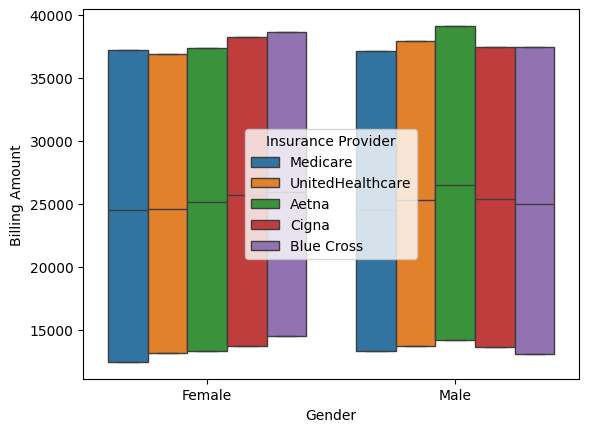

In [10]:

df.columns
bills= df['Billing Amount']
# WE NEED TO ROUND THESE NUMS UP WITH THE FOLLWING LINE
bill_fix =bills.round().astype(int)
df['Billing Amount']=bill_fix

New = df[['Gender','Insurance Provider','Billing Amount','Medication']]

sns.boxplot(data  = New, x= 'Gender', y = 'Billing Amount', hue = 'Insurance Provider',showfliers = False,whis=False)



On this section we tried to find the relation between the billing amount and the medication, we can see that the medication most used on both gender are Aspirin and Lipitor

<Axes: xlabel='Gender', ylabel='Billing Amount'>

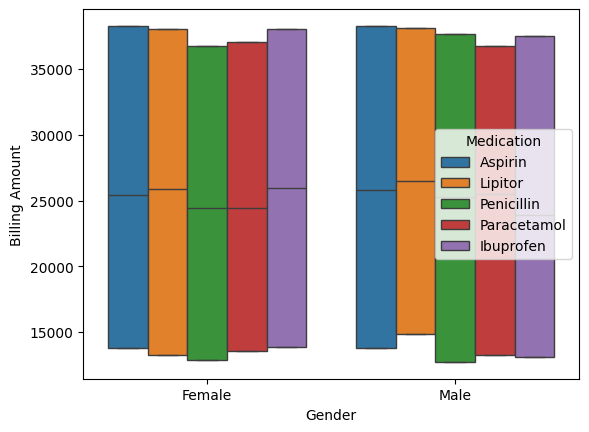

In [11]:
sns.boxplot(data  = New, x= 'Gender', y = 'Billing Amount', hue = 'Medication',showfliers = False, whis=False)

Text(0.5, 1.0, 'Frecuencia por Enfermedad')

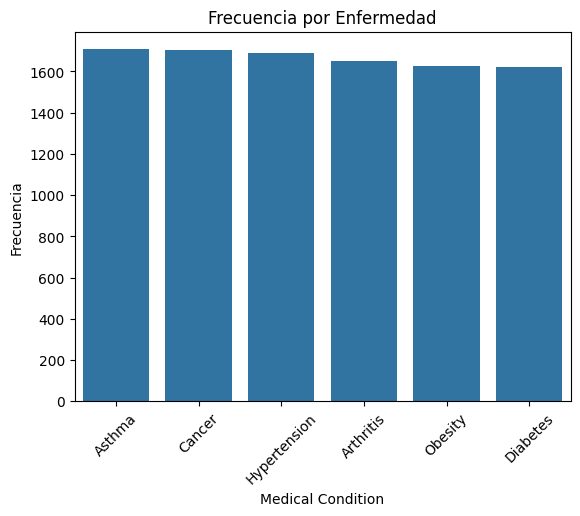

In [12]:

x=df['Medical Condition'].value_counts().index
y=df['Medical Condition'].value_counts().values 
sns.barplot(x=x, y=y)
plt.xticks(rotation=45)
plt.xlabel('Medical Condition')
plt.ylabel('Frecuencia')
plt.title('Frecuencia por Enfermedad')



(0.0, 1200.0)

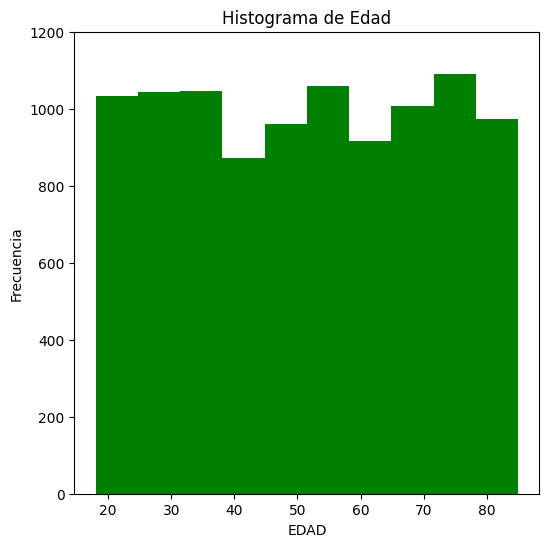

In [30]:
fig, ax = plt.subplots(figsize=(6,6))
ax.hist(x= df.Age, density=False, orientation='vertical', color='g')
ax.set_xlabel('EDAD')
ax.set_ylabel('Frecuencia')
ax.set_title('Histograma de Edad')
ax.set_ylim(0,1200)

